In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns
sns.set()

In [2]:
!git clone https://github.com/indobenchmark/indonlu

Cloning into 'indonlu'...
remote: Enumerating objects: 466, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 466 (delta 107), reused 106 (delta 103), pack-reused 316
Receiving objects: 100% (466/466), 5.16 MiB | 12.32 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [3]:
data_train = pd.read_csv('/content/indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t', names=["Teks", "Target"])
data_test = pd.read_csv('/content/indonlu/dataset/smsa_doc-sentiment-prosa/valid_preprocess.tsv', sep='\t', names=["Teks", "Target"])
data_train.head(5)

,Teks,Target
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [4]:
data_train.shape, data_test.shape

((11000, 2), (1260, 2))

In [5]:
pd.value_counts(data_train["Target"])

positive    6416
negative    3436
neutral     1148
Name: Target, dtype: int64

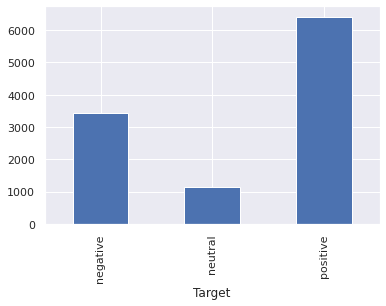

In [6]:
data_train.groupby('Target').size().plot(kind='bar');

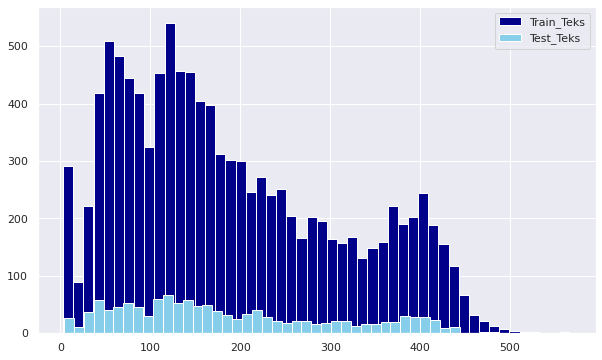

In [7]:
# Melihat panjang teks dalam data train dan data test
  
length_train = data_train['Teks'].str.len()
length_test = data_test['Teks'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_Teks", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_Teks', color = "skyblue")
plt.legend()
plt.show()

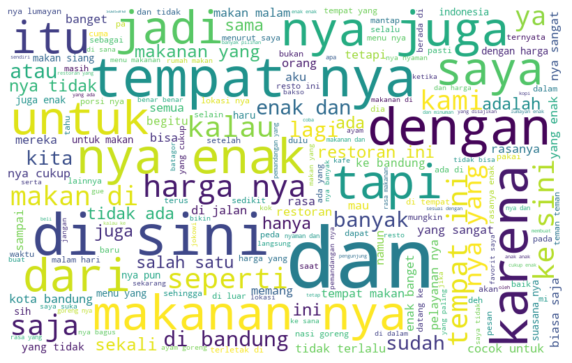

In [8]:
# Sentimen yang ada pada seluruh data train dapat dilihat dengan memahami kata yang umum dengan plot word cloud
  
def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
  
all_words = ' '.join([text for text in data_train['Teks']])
wordCloud(all_words)

In [9]:
all_words

'warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal ! mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak . betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi ! duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa

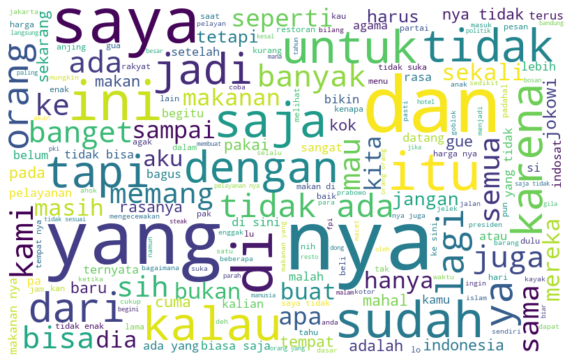

In [10]:
# Melihat kata-kata yang negatif
negative_words = ' '.join(text for text in data_train['Teks'][data_train['Target'] == 'negative']) 
wordCloud(negative_words)

In [11]:
negative_words

'duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa . pakai kartu kredit bca tidak untung malah rugi besar simcard indosat inaktiv gara-gara lupa isi pulsa dan kabar nya aktif jika pinda ke pasca bayar , ribet banget sifat iri sering muncul pada orang orang yang tidak punya tujuan hidup pengalaman bersama indosat hari ini , semoga tidak terjadi pada pelanggan lain . sempat sampai marah-marah dengan pelayanan pelanggan indosat anak sekarang sulit untuk dinasehati hanya mengatasi masalah kayak gini saja anies sandi tidak becus . ke mana saja pasukan kebersihan yang begitu banyak jumlah nya ? alhamdulillah hari ini tidak ke jalan bugel agak kesal juga kalau tiap hari lewat sana melulu . sempit , dua arah , macet sudah jadi makanan sehari-hari respon agak lama , sama sayang nya rem nya bukan asli , masih rom distrobitor malu - mal

In [12]:
# Melakukan vektorisasi untuk mengekstrak fitur dengan TF-IDF
vectorizer = TfidfVectorizer(min_df = 5,
                              max_df = 0.8,
                              sublinear_tf = True, # Scaling
                              use_idf = True)
  
train_vectors = vectorizer.fit_transform(data_train['Teks'])
test_vectors = vectorizer.transform(data_test['Teks'])

In [13]:
# melakukan klasifikasi dengan SVM, kernel=linear
model = SVC(kernel='linear')
model.fit(train_vectors, data_train['Target'])
prediction_linear = model.predict(test_vectors)

In [14]:
# print metriks
target_names = ['positive', 'negative', 'netral']
print(classification_report(data_test['Target'], prediction_linear, target_names=target_names))

              precision    recall  f1-score   support

    positive       0.81      0.86      0.84       394
    negative       0.79      0.70      0.74       131
      netral       0.92      0.91      0.91       735

    accuracy                           0.87      1260
   macro avg       0.84      0.82      0.83      1260
weighted avg       0.87      0.87      0.87      1260



In [15]:
teks = "Bahagia hatiku melihat pernikahan putri sulungku yang cantik jelita"
teks_vector = vectorizer.transform([teks]) # vectorizing
print(model.predict(teks_vector))

['positive']
